# underfitting - overfitting
underfitting, eğitimin yetersi olması durumu. Model yeterince eğitilmedi, eğitim verilerinde de geçerleme verilerinde de kötü başarı

overfitting, eğitim verilerindeki başarı ile geçerleme verileri arasındaki yüksek fark. Model eğitim verilerindeki patternleri ezberledi fakat ilk kez gördüğü yapılardakileri anlamakta zorlanıyor.


Veri setindeki az sayıda olan veriler de eğitimin başarısı etkiler. Bir örnekten çok az görürse onun hakkında yanlış "genelleme" yapabilir. Fakat bu genelleme her zaman doğru ilişkiyi vermeyebilir.

Aynı şekilde gürültü de modelin başarısında büyük bir etkidir, açık veya belirgin olmayan bazı görüntülerdeki patternleri bulmak ve algılamak bir o kadar zordur.

In [ ]:
# MNIST veri setine biraz gürültü ekliyoruz

from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
  [train_images, np.random.random((len(train_images), 784))], axis=1) # gürültü eklendi


train_images_with_zeros_channels = np.concatenate(
  [train_images, np.zeros((len(train_images), 784))], axis=1) # gürültüsüz

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation="relu"),
      layers.Dense(10, activation="softmax")
  ])

  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

  return model

model = get_model()

history_noise = model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

model = get_model()

history_zeros = model.fit(
    train_images_with_zeros_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6947 - loss: 1.0549 - val_accuracy: 0.9080 - val_loss: 0.3085
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9077 - loss: 0.2935 - val_accuracy: 0.9433 - val_loss: 0.1910
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9428 - loss: 0.1848 - val_accuracy: 0.9428 - val_loss: 0.1910
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9624 - loss: 0.1240 - val_accuracy: 0.9578 - val_loss: 0.1487
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9713 - loss: 0.0919 - val_accuracy: 0.9510 - val_loss: 0.1721
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9787 - loss: 0.0699 - val_accuracy: 0.9595 - val_loss: 0.1372
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9845 - loss: 0.0497 - val_accuracy: 0.9590 - val_loss: 0.1501
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9897 - loss: 0.0343 - val_

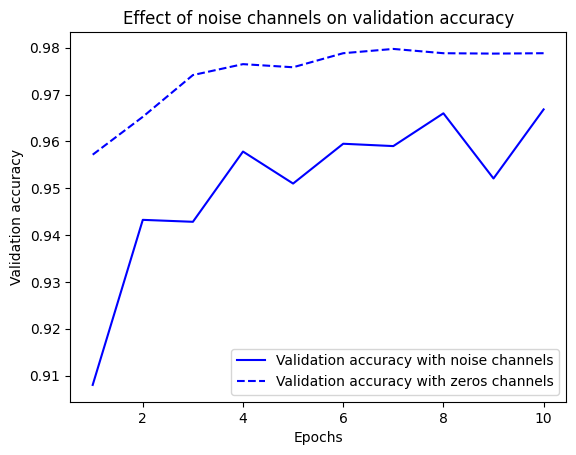

In [ ]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zero = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label = "Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zero, "b--",
         label = "Validation accuracy with zeros channels")

plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation accuracy")
plt.legend()

görüldüğü üzere gürültü olduğunda modelin doğruluk başarısı düşüyor. Bu feature'ların hangilerinin gürültülü olduğu ve dikkat dağıttığını bilmiyoruz. Bunları eleyebilsek daha doğru sonuçlar elde edebilirdik, bu yönteme `feature selection` deniyor.

IMDB filmlerinde en çok kullanılan 10.000 kelimeyi seçmek bir feature selection'dır.

# Genellemenin yapısı

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

# etiketleri kopyaladık
random_train_labels = train_labels[:]

# etiketleri karıştır, her görselin etiketi artık yanlış
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")

])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)



Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.1033 - loss: 2.3319 - val_accuracy: 0.1032 - val_loss: 2.3107
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1198 - loss: 2.2967 - val_accuracy: 0.0971 - val_loss: 2.3154
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1286 - loss: 2.2879 - val_accuracy: 0.0992 - val_loss: 2.3192
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1419 - loss: 2.2742 - val_accuracy: 0.0985 - val_loss: 2.3271
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1569 - loss: 2.2593 - val_accuracy: 0.1013 - val_loss: 2.3351
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.1725 - loss: 2.2384 - val_accuracy: 0.1003 - val_loss: 2.3494
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1866 - loss: 2.2124 - val_accuracy: 0.1025 - val_loss: 2.3600
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.2025 - loss: 2.1818 - 

# manifold hipotezi
Her bir görsel MNIST veri setinde 28x28 pikselden oluşuyor. Yani toplamda 784 adet piksel. Bu piksellerin de hepsi 0-255 arasında değerler alıyor. Yani 784^256 adet değer yapar bu. Bu bizim uzayımız fakat üzerinde çalışmak istediğim rakamlar bundan çok çok daha küçük bir `subspace` (alt-uzay) içerisinde. Bu alt uzay:
- **süreklidir**. Bir rakam üzerinde ufak oynamalar yapsanız dahi o rakam gibi görünmeye devam eder.
- **bağlantılıdır**. İki rakam arasında belli bir geçiş vardır.

## Manifold nedir?
**Manifold, yüksek boyutlu bir uzayın içindeki ama daha az boyutlu ve yerel olarak düz gibi davranan bir yapıdır. **

Örnek olarak 1 boyutlu manifoldu düşünelim. "O" harfi gibi bir eğri iki boyutlu düzlemde bulunur (x ve y ekseni). Fakat kendi üzerinde yalnızca ileri-geri hareket edebilirsiniz. Bu da onu 1 boyutlu yapar.

2 boyutlu manifold için bir küre yüzeyi düşünelim, örneğin Dünya. Küre aslında üç boyutlu uzaydadır (x, y ve z) ama yüzeyinde dolaşan biri için dünya iki boyutludur: enlem ve boylam. Bu da onu iki boyutlu yapar.

## Peki bu manifold hipotezi makine öğrenmesinde ne anlama geliyor?
- Doğal veriler, yüksek boyutlu uzayda düşük boyutlu ve düzenli manifoldlar üzerinde yer alır.
- Bu yalnızca MNIST veri seti için değil; insan yüzleri, ağaç yapıları, sesler için de geçerlidir.


##  Manifold hipotezinin sonuçları
- Makine öğrenmesi modelleri, tüm giriş uzayını değil, sadece basit, düşük boyutlu ve düzenli alt uzayları öğrenmek zorunda. **İndirgiyor** aslında. Bu alt uzaylara `latent manifold` nedir
- Aynı manifold üzerinde yer alan iki örnek arasında süreçli dönüşümler (`interpolation`) yapılabilir. Yani bir görüntü, bir diğerine yavaşça dönüştürülebilir ve bu dönüşüm boyunca tüm örnekler hala anlamlı olur




# İnterpolasyon ile genelleme
Amacımız, veri üzerinde genelleme yapabilmek, yani daha önce hiç görmediğimiz bir şeyi, daha önce gördüğümüz örnekler üzerinden tahmin edebilmek.
Bunu da, verilerin yer aldığı manifold üzerindeki yakın noktaları ilişkilendirerek yapabiliriz.

Ancak, interpolasyon temelli genelleme yalnızca birbirine benzeyen iki örnek arasında düzgün ve sürekli bir geçiş yapılabiliyorsa işe yarar. Buna `yerel genelleme` denir.

Fakat insan bundan çok daha beceriklidir, insan `ekstrem (uç) genelleme` yapabilir. Hiç görmediği bir şehre gittiğinde hayatta kalabilmesinin, yolunu bulabilmesinin sebebi bu uç genelleme, soyutlama, mantık ve sezgi becerileri sayesindedir.

# Derin öğrenme neden işe yarıyor?

Bir kağıdı buruşturup top yaptığımızı hayal edelim. Kağıt normalde 2 boyutlu fakat, top yaptığımız için artık 3 boyutlu oldu. Bize gerekli olan, asıl anlamlı olan kısım 2 boyutlu olan kısım. Bu sebeple bu topu kıvrılma yerlerinden açıp düzleştirerek istediğimiz forma getirip sonrasında bilgileri almamız gerekiyor. Derin öğrenme de tam olarak bu şekilde çalışıyor.

## Modelin görevi
- girdiyi al -> doğru çıktıyı üret

- Girdimiz 28x28 bir resim, 3 rakamı yazıyor diyelim

- Beklenen çıktı: 3

Model bunu yapabilmek için kendi içinde bir fonksiyon öğreniyor. Bu fonksiyonu çok boyutlu bir eğri olarak düşünebiliriz.


Bu eğri bize hangi girdinin hangi çıktıyı verdiğini söylüyor fakat en başta doğru eğriyi bilmiyoruz. Bu yüzden rastgele başlıyoruz.


Eğrinin doğru değerleri gösterebilmesi için belli oranlarda ve yönlerde değişmesi gerekiyor. Bu eğrinin ne yönde ne kadar değişeceğini de gradyan inişi ile tespit ediyoruz.

Bu işlem tekrar tekrar uygulanıyor ve istenilen sonuçlar elde edildikçe eğrimiz şekilleniyor. Yani topumuz yavaş yavaş açılıyor ve a4 şekline geliyor. Üzerinde bazı kırışıklıklar olsa da genel olarak istediğimiz hedefe ulaştık.


# Modelin eğitim süreci

## Tuning (ayarlama)
**hiperparametre:** kaç katman olacağı ve katmanların boyutları, learning rate
**parametre:** ağırlıklar

Bunları validation sonuca göre değiştirerek, overfit'in önüne geçilebilir. Bunu validation setine göre yapmamız, validation'dan bazı bilgileri modele aktarıyoruz anlamına geliyor, buna `information leaks` deniyor. Bu bir kez yapılırsa sorun değil fakat biz sürekli hiperparametre değiştirirsek çok fazla bilgi aktarılmış olur ve overfitting gerçekleşir.


Bu sebeple model tamamen oturana kadar test verileri hiç gösterilmez. Tamamen ilk kez göreceği verileri görmeli.

Veriyi eğitim ve geçerleme olarak bölme yöntemleri:
1. Simple Holdout Validation
  - Veriyi: Eğitim / Doğrulama / Test olarak böl
  - En basit yöntem

```
validation_data = data[:num_validation_samples]
training_data = data[num_validation_samples:]
model = get_model()
model.fit(training_data, ...)
validation_score = model.evaluate(validation_data, ...)
... # tune yapılacak yer
model = get_model()
model.fit(np.concatenate([training_data,
validation_data]), ...)
test_score = model.evaluate(test_data, ...)

```


  2. K-Fold Validation
  - Veriyi K parçaya böl
  - Her seferinde 1 parça validation, diğerleri eğitim olur
  - Daha az veriyle daha iyi sonuç verir

```
k = 3
num_validation_samples = len(data) // k
np.random.shuffle(data)
validation_scores = []

for fold in range(k):
    validation_data = data[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_data = np.concatenate(
        [data[:num_validation_samples * fold],
         data[num_validation_samples * (fold + 1):]])
    
    model = get_model()
    model.fit(training_data, ...)
    validation_score = model.evaluate(validation_data, ...)
    validation_scores.append(validation_score)

validation_score = np.average(validation_scores)

model = get_model()
model.fit(data, ...)
test_score = model.evaluate(test_data, ...)

```


  3. Iterated K-Fold + Shuffling

  - K-Fold’un her tekrarında veri karıştırılır
  - Az veriyle daha kararlı sonuçlar sağlar



# common-sense baseline
Model düzgün çalışıyor mu diye belirlediğimiz bir referans aslında. Bu referansı geçebiliyor mu geçemiyor mu diye bakıyoruz

# modeli değerlendirirken göz önüne alınacaklar
* Verinin nasıl olduğu: test - eğitim verileri rastgele ve homojen dağılmalı
* zaman: geleceği tahmin etmeye çalışıyorsun verileri karmamak daha mantıklı.
* veri tekrarı: bazen aynı verilerden birden fazla olabilir. Bunların biri eğitim verilerinde, biri de test verilerinde olursa model daha önceden gördüğü ve ezberlediği şeyi tekrarlamış olur. Bu iki veri seti birbirinden ayrı (disjoint) olmalı.


# Model uyumunu değiştirme (fit)
- Sınırları bilebilmek için öncelikle modeli overfit'e zorlamak gerekir.

üç yaygın problem:
1. training loss zamanla düşmüyorsa, model hiçbir şey öğrenmiyor demektir.
2. Eğitim başlıyor ama baseline referansımız değişmiyor.
3. Model genelleme yapıyor referansı geçiyor ama yine de yeteri kadar iyi değil, underfit. Kapasite yetersiz.

## Tuning'in anahtarı gradient descent
Loss düşmüyor ise bu ezberlediği anlamına gelir ve bunu gradient descent ile çözebiliriz.

Böyle bir durumda etkili olanlar: optimizer, modelin ağırlıkları, learning rate ve batch size. Hepsi birbirinden ayrık bir şekilde modelin daha iyi çalışması için önemlidir. Learning rate ve batch size dışındakiler sürekli olarak değişir.

In [1]:
# çok yüksek bir learning rate ile MNIST veri setinde model geliştirmek
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.datasets import mnist


(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.4276 - loss: 2341.2217 - val_accuracy: 0.1913 - val_loss: 2.0915
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.2137 - loss: 2.4920 - val_accuracy: 0.1897 - val_loss: 2.2210
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1853 - loss: 2.4919 - val_accuracy: 0.1898 - val_loss: 2.2157
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.2035 - loss: 2.5564 - val_accuracy: 0.1629 - val_loss: 9.1669
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2089 - loss: 2.5025 - val_accuracy: 0.1850 - val_loss: 2.2234
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1919 - loss: 2.2233 - val_accuracy: 0.2264 - val_loss: 2.1524
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2203 - loss: 2.4539 - val_accuracy: 0.1812 - val_loss: 2.2286
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s

In [2]:
# aynı modeli daha uygun bir learning rate ile çalıştırmak
# çok yüksek bir learning rate ile MNIST veri setinde model geliştirmek

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8332 - loss: 0.7738 - val_accuracy: 0.9576 - val_loss: 0.1437
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9626 - loss: 0.1270 - val_accuracy: 0.9676 - val_loss: 0.1242
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9756 - loss: 0.0845 - val_accuracy: 0.9668 - val_loss: 0.1538
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9790 - loss: 0.0782 - val_accuracy: 0.9628 - val_loss: 0.1697
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9813 - loss: 0.0691 - val_accuracy: 0.9712 - val_loss: 0.1588
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9849 - loss: 0.0595 - val_accuracy: 0.9730 - val_loss: 0.1704
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9881 - loss: 0.0469 - val_accuracy: 0.9709 - val_loss: 0.1871
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9894 - loss: 0.0451 - val_accu

# model kapasitesini yükseltme
Eğer ki validation metrikleri düşüyorsa fakat belli oranda bir genellemeye sahipsen başardık demektir. Sonuca çok yakınız. Öncelikle yapmamız gereken modeli overfit etmek

In [3]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7339 - loss: 1.0521 - val_accuracy: 0.9055 - val_loss: 0.3608
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8961 - loss: 0.3692 - val_accuracy: 0.9152 - val_loss: 0.3107
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9129 - loss: 0.3196 - val_accuracy: 0.9192 - val_loss: 0.2926
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9170 - loss: 0.3009 - val_accuracy: 0.9195 - val_loss: 0.2847
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9170 - loss: 0.2968 - val_accuracy: 0.9240 - val_loss: 0.2790
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9203 - loss: 0.2824 - val_accuracy: 0.9247 - val_loss: 0.2753
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9218 - loss: 0.2817 - val_accuracy: 0.9262 - val_loss: 0.2723
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9234 - loss: 0.2747 - val_accuracy: 0.

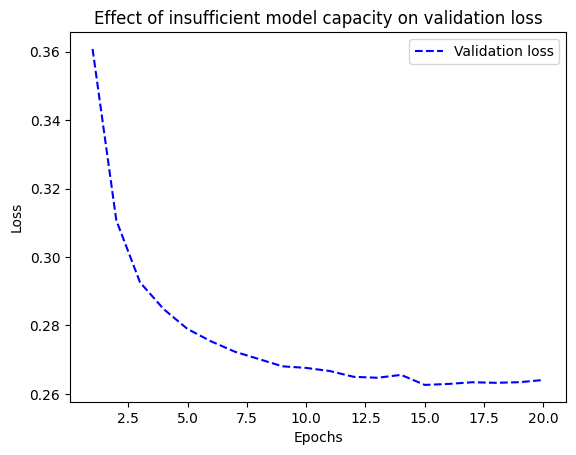

In [5]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs=range(1,21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

modelimizde loss 0.26 civarlarında takılıp kaldı ve daha da gelişmiyor. Biz ise bunun overfit olmasını istiyoruz. Bu bizim modelimizin `representational power`'ı ile ilgili. Yani kapasitesi. Daha büyük kapasiteli, biraz daha karmaşık bir model yazıp tekrar çalıştıralım.  

In [7]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax")])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8348 - loss: 0.6071 - val_accuracy: 0.9402 - val_loss: 0.1989
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9511 - loss: 0.1677 - val_accuracy: 0.9589 - val_loss: 0.1400
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9657 - loss: 0.1144 - val_accuracy: 0.9640 - val_loss: 0.1224
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9753 - loss: 0.0848 - val_accuracy: 0.9667 - val_loss: 0.1128
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9796 - loss: 0.0680 - val_accuracy: 0.9723 - val_loss: 0.0985
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9844 - loss: 0.0538 - val_accuracy: 0.9698 - val_loss: 0.1019
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9861 - loss: 0.0448 - val_accuracy: 0.9733 - val_loss: 0.0944
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9892 - loss: 0.0375 - val_accuracy: 0.

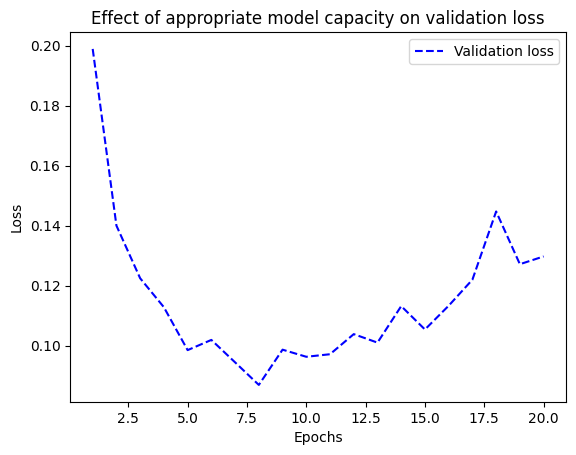

In [8]:
val_loss = history_large_model.history["val_loss"]
epochs=range(1,21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of appropriate model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Genellemeyi geliştirmek
Modelimiz artık overfit olabilme becerisine sahipse amacımız genelleme konusunda en iyisini hedeflemek olmalı.
## Veri setinin iyileştirilmesi (dataset curation)
Veri setiyle ilgili birçok problem olabilir:
- Yetersiz veri: daha fazla veri bulmak gerekir
- etiketlemedeki hatalar: gerekiyorsa verileri kendimiz etiketlemeliyiz
- verilerin temizliği ve "kayıp değerler?"
- çok fazla feature varsa `feature selection` yapılmalı

Genellemeyi artırmak için yapılabilecek şeylerden biri `feature engineering` olur.

## Feature engineering
Problemi çok kolay bir şekilde ifade ederek kolaylaştırmak.
`Latent manifold`u daha kolay ve geçişi daha yumuşak yapabilmemizi sağlar. Bu sebeple problemi derininde iyi anlamamız gerekir.

Saatin gösteriminde pikseller yerine koordinatlar, hatta koordinatlar yerine açıları kullanmak bir örnek olabilir.

## Early stopping (erken durdurma)
Model epoch'lar arttıkça bir yerden sonra kötüleşmeye başlayabilir. Aralarda bir yerde genelleme çok iyidir fakat sonrasında bozuluyor olabilir. Erken durdurma burada devreye giriyor, en yüksek değerdeysek ve sonrasında artık bozuluyorsa eğitimi orada bırakabiliriz.

## Modeli ayarlama (regularizing)
Regülarizasyon teknikleri validation esnasında en iyi performansı alabilmek için eğitimin mükemmelce yapılması anlamına gelir.

Filmlerdeki yorumların sınıflandırması modelimiz üzerinden bazı regülarizasyon tiplerine bakalım

### Ağın (network) boyutunu azaltma
Model çok küçük olursa overfit olamayacağından bahsetmiştik. Bu yüzden katman sayıları ve her katmandaki birimleri azaltarak ağın boyutunu düşürebiliriz. Fakat burada önemli olan ağın boyutunu çok fazla düşürüp modeli yetersiz bir kapasiteye düşürmemek.

In [10]:
# orijinal model

from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.6965 - loss: 0.6126 - val_accuracy: 0.8634 - val_loss: 0.4210
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.8888 - loss: 0.3631 - val_accuracy: 0.8817 - val_loss: 0.3190
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9162 - loss: 0.2570 - val_accuracy: 0.8879 - val_loss: 0.2857
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9365 - loss: 0.2014 - val_accuracy: 0.8876 - val_loss: 0.2773
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9479 - loss: 0.1653 - val_accuracy: 0.8891 - val_loss: 0.2770
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9557 - loss: 0.1452 - val_accuracy: 0.8873 - val_loss: 0.2843
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9659 - loss: 0.1225 - val_accuracy: 0.8855 - val_loss: 0.2952
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9675 - loss: 0.1111 - val_accuracy: 0.8845 - 

In [11]:
# daha küçük model

model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_smaller_model = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.6769 - loss: 0.6705 - val_accuracy: 0.8382 - val_loss: 0.6001
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8576 - loss: 0.5743 - val_accuracy: 0.8590 - val_loss: 0.5222
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8778 - loss: 0.4897 - val_accuracy: 0.8683 - val_loss: 0.4461
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.8950 - loss: 0.4059 - val_accuracy: 0.8747 - val_loss: 0.3899
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9046 - loss: 0.3447 - val_accuracy: 0.8792 - val_loss: 0.3482
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9117 - loss: 0.2978 - val_accuracy: 0.8790 - val_loss: 0.3252
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9234 - loss: 0.2590 - val_accuracy: 0.8812 - val_loss: 0.3057
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9295 - loss: 0.2299 - val_accuracy: 0.8893 - v

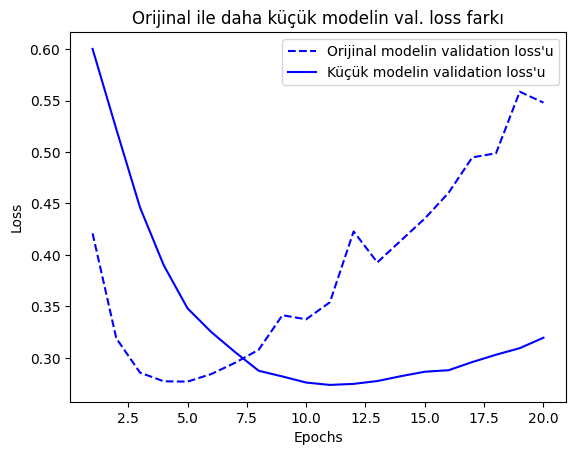

In [13]:
val_loss_original = history_original.history["val_loss"]
val_loss_smaller = history_smaller_model.history["val_loss"]
epochs=range(1,21)
plt.plot(epochs, val_loss_original, "b--",
         label="Orijinal modelin validation loss'u")
plt.plot(epochs, val_loss_smaller, "b-",
         label="Küçük modelin validation loss'u")
plt.title("Orijinal ile daha küçük modelin val. loss farkı")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

küçük model, orijinalden daha sonra overfit olmaya başladı

In [14]:
# daha büyük bir kapaisteye sahip bir model
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_higher_model = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 405ms/step - accuracy: 0.6327 - loss: 0.6491 - val_accuracy: 0.8660 - val_loss: 0.3532
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 363ms/step - accuracy: 0.8599 - loss: 0.3538 - val_accuracy: 0.8811 - val_loss: 0.2884
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 417ms/step - accuracy: 0.8945 - loss: 0.2573 - val_accuracy: 0.8727 - val_loss: 0.3080
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 301ms/step - accuracy: 0.9269 - loss: 0.1873 - val_accuracy: 0.8823 - val_loss: 0.2862
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 359ms/step - accuracy: 0.9452 - loss: 0.1414 - val_accuracy: 0.8882 - val_loss: 0.2784
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 422ms/step - accuracy: 0.9664 - loss: 0.0929 - val_accuracy: 0.8849 - val_loss: 0.3099
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 325ms/step - accuracy: 0.9771 - loss: 0.0684 - val_accuracy: 0.8742 - val_loss: 0.3960
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 361ms/step - accuracy: 0.9681 - loss: 0.0818 - val_accu

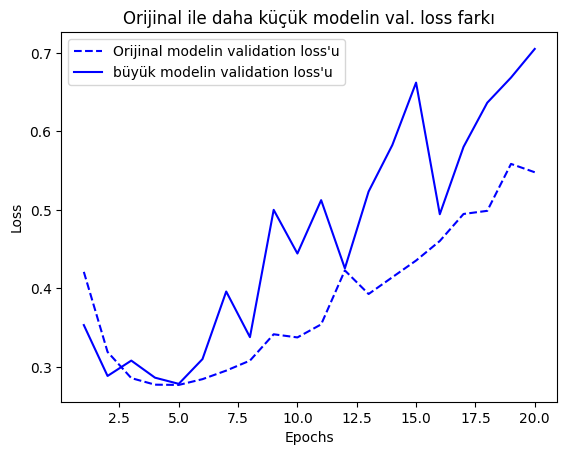

In [15]:
val_loss_original = history_original.history["val_loss"]
val_loss_higher = history_higher_model.history["val_loss"]
epochs=range(1,21)
plt.plot(epochs, val_loss_original, "b--",
         label="Orijinal modelin validation loss'u")
plt.plot(epochs, val_loss_higher, "b-",
         label="büyük modelin validation loss'u")
plt.title("Orijinal ile daha küçük modelin val. loss farkı")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

büyük olan model anında overfit olmaya başlıyor. Loss da çok gürültülü

### Ağırlık ekleme regülarizasyonu
Bir şeyi açıklamanın iki yolu varsa kolay olan seçilir. Ağırlıklardan da daha küçük olanları isteriz. Bu sebeple büyük olan ağırlıklar modele ceza olarak yazılır.


Teknik olarak loss fonksiyonuna fazladan bir "ceza" ekliyoruz.

İki tür ceza regülarizasyonu var.
1. L1 Regularization
  - Ceza: Ağırlıkların mutlak değerlerinin toplamı
  - Etkisi: Bazı ağırlıkları tam sıfıra indirir -> sparse (seyrek) modeller

2. L2 Regularization (weight decay)
  - Ceza: Ağırlıkların karelerinin toplamı
  - Etkisi: Ağırlıkları küçültür, ama sıfıra zorlamaz -> daha yumuşak



In [16]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002), # 0.002 * weight ** 2
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.6719 - loss: 0.7231 - val_accuracy: 0.8453 - val_loss: 0.5320
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8793 - loss: 0.4785 - val_accuracy: 0.8765 - val_loss: 0.4198
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9019 - loss: 0.3771 - val_accuracy: 0.8803 - val_loss: 0.3856
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9101 - loss: 0.3325 - val_accuracy: 0.8850 - val_loss: 0.3635
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9268 - loss: 0.2959 - val_accuracy: 0.8871 - val_loss: 0.3561
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9355 - loss: 0.2752 - val_accuracy: 0.8867 - val_loss: 0.3561
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9383 - loss: 0.2636 - val_accuracy: 0.8803 - val_loss: 0.3657
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9478 - loss: 0.2448 - val_accuracy: 0.8823 - v

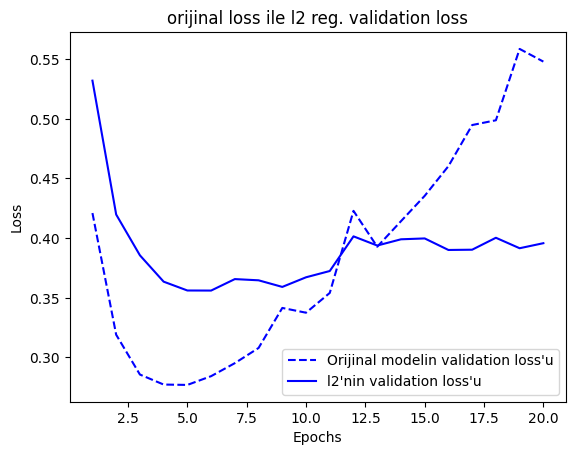

In [17]:
val_loss_original = history_original.history["val_loss"]
val_loss_l2_reg = history_l2_reg.history["val_loss"]
epochs=range(1,21)
plt.plot(epochs, val_loss_original, "b--",
         label="Orijinal modelin validation loss'u")
plt.plot(epochs, val_loss_l2_reg, "b-",
         label="l2'nin validation loss'u")
plt.title("orijinal loss ile l2 reg. validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [18]:
# L2 alternatifi olarak

from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

# Dropout ile overfitting azaltmak
Yöntem: Eğitim sırasında katmandaki bazı nöronları rastgele devre dışı bırakmak (sıfırlamak)

## Nasıl çalışıyor?

Örneğin bir katmanda çıktı şu olsun

`[0.2, 0.5, 1.3, 0.8, 1.1]`

dropout sonrasında bu çıktı şu hale gelir

`[0.0, 0.5, 1.3, 0.8, 1.1]`


Bu oran genellikle %20 ile %50 arasında seçilir -> `Droput rate`

`layer_output *= np.random.randint(0, high=2, size_layer_output.shape)`

## Test zamanında ne olur?
 - Test sırasında hiçbir nöron devre dışı bırakılmaz
 - Ancak eğitimle tutarlılık sağlamak için çıkışlar küçültülür (örneğin 0.5 ile çarpılır)

`layer_output *= 0.5`

 ## Neden işe yarıyor?

 > "Bankadaki çalışanları sürekli farklı şubelere yolluyorlar. Böylece hile yapmaları için iş birliği kurmaları zorlaşıyor."

 - Her eğitim örneğinde farklı nöronlar devre dışı bıraklır
 - Bu da ağ içindeki gereksiz "iş birliklerini" bozar
 - Modelin ezber yapmasını engeller
 - Daha sağlam, daha genelleyici hale gelir

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.5606 - loss: 0.6745 - val_accuracy: 0.8326 - val_loss: 0.5468
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7255 - loss: 0.5566 - val_accuracy: 0.8705 - val_loss: 0.4321
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7960 - loss: 0.4720 - val_accuracy: 0.8821 - val_loss: 0.3599
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8302 - loss: 0.4043 - val_accuracy: 0.8885 - val_loss: 0.3151
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8609 - loss: 0.3604 - val_accuracy: 0.8924 - val_loss: 0.2897
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8798 - loss: 0.3179 - val_accuracy: 0.8654 - val_loss: 0.3233
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8890 - loss: 0.2900 - val_accuracy: 0.8938 - val_loss: 0.2716
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9071 - loss: 0.2652 - val_accuracy: 0.8899 - v

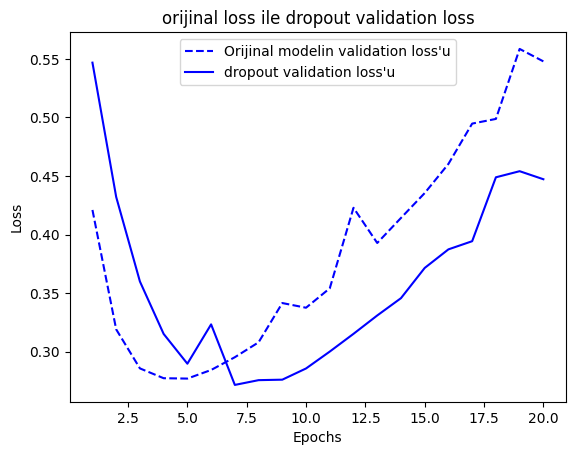

In [21]:
val_loss_original = history_original.history["val_loss"]
val_loss_dropout = history_dropout.history["val_loss"]
epochs=range(1,21)
plt.plot(epochs, val_loss_original, "b--",
         label="Orijinal modelin validation loss'u")
plt.plot(epochs, val_loss_dropout, "b-",
         label="dropout validation loss'u")
plt.title("orijinal loss ile dropout validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()